In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [22]:
cont_df = df.select_dtypes(include=['int64','float64'])
cont_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [23]:
#### Finding the distribution
def plot_histplot(df):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(df.columns):
        plt.subplot(4,4,i+1)
        plt.hist(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

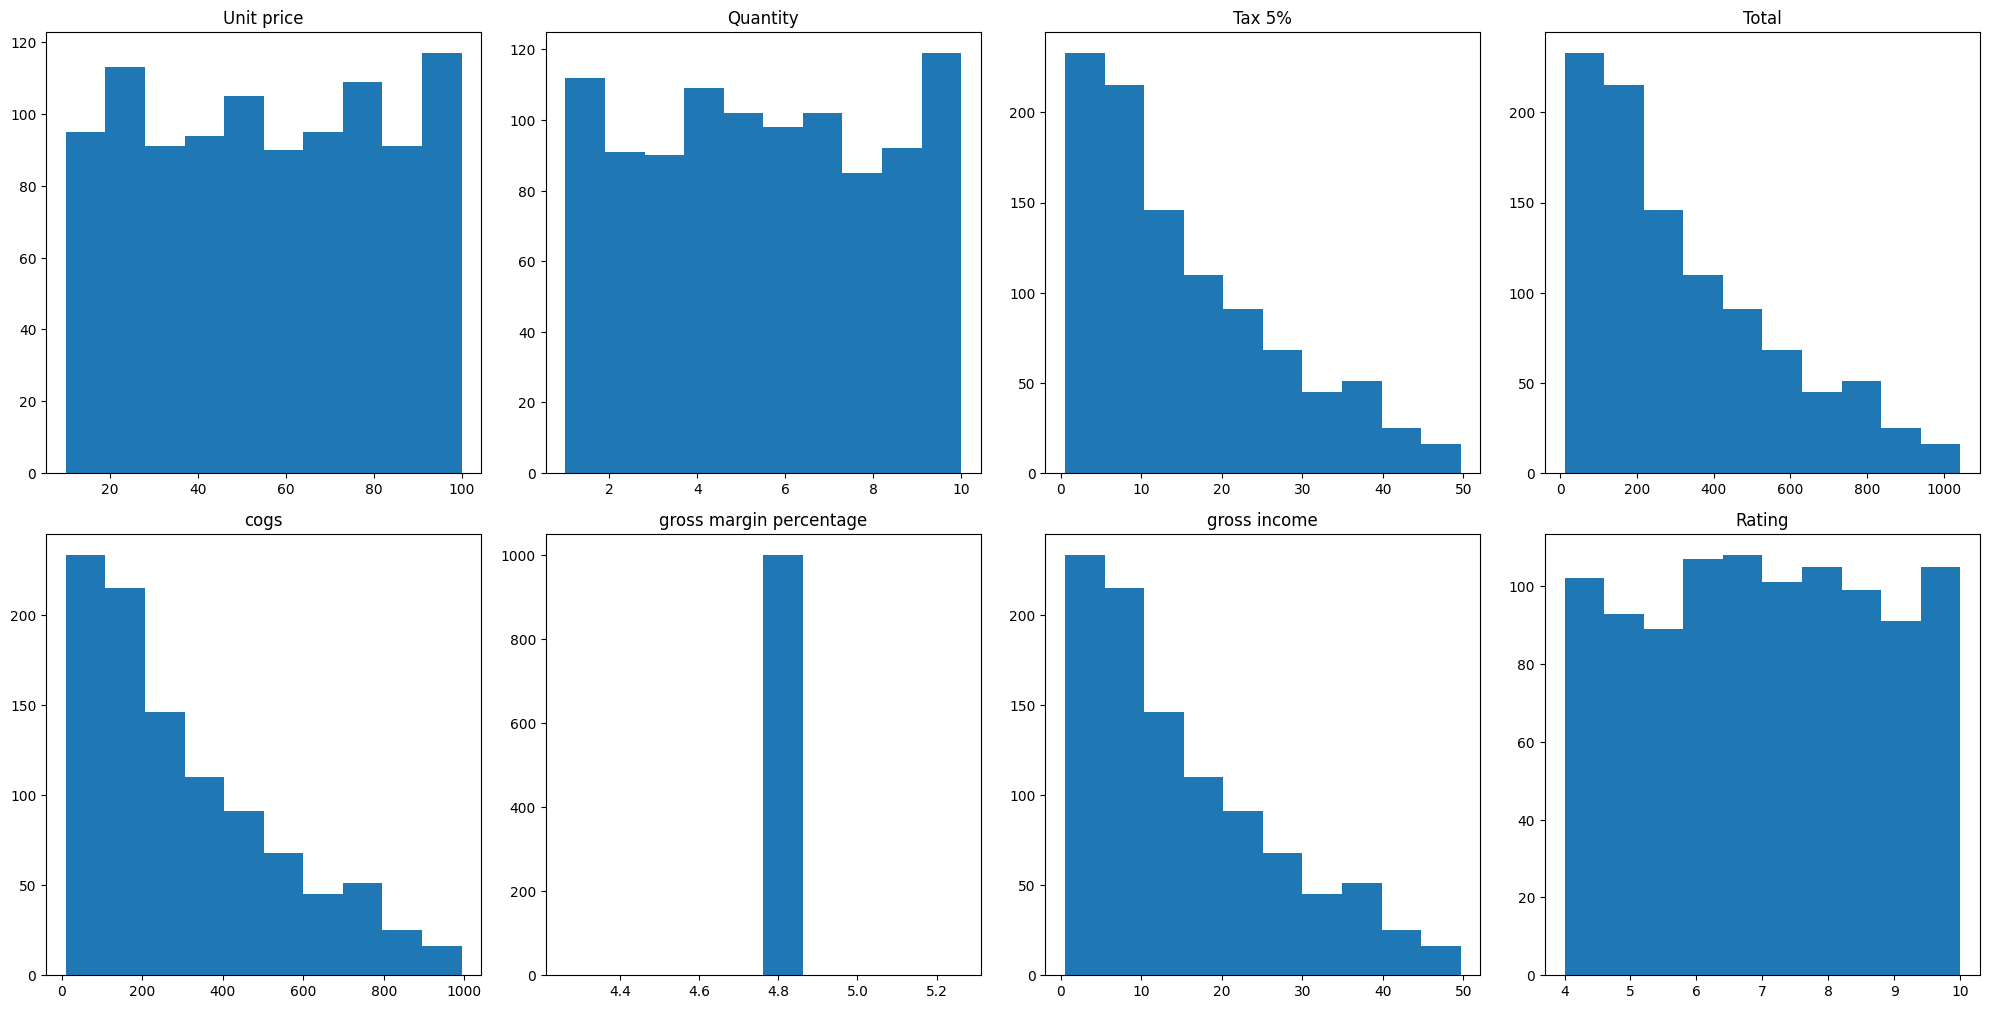

In [24]:
plot_histplot(cont_df)

In [25]:
## Checking for outliers
def plot_boxplot(df):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(df.columns):
        plt.subplot(4,4,i+1)
        plt.boxplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

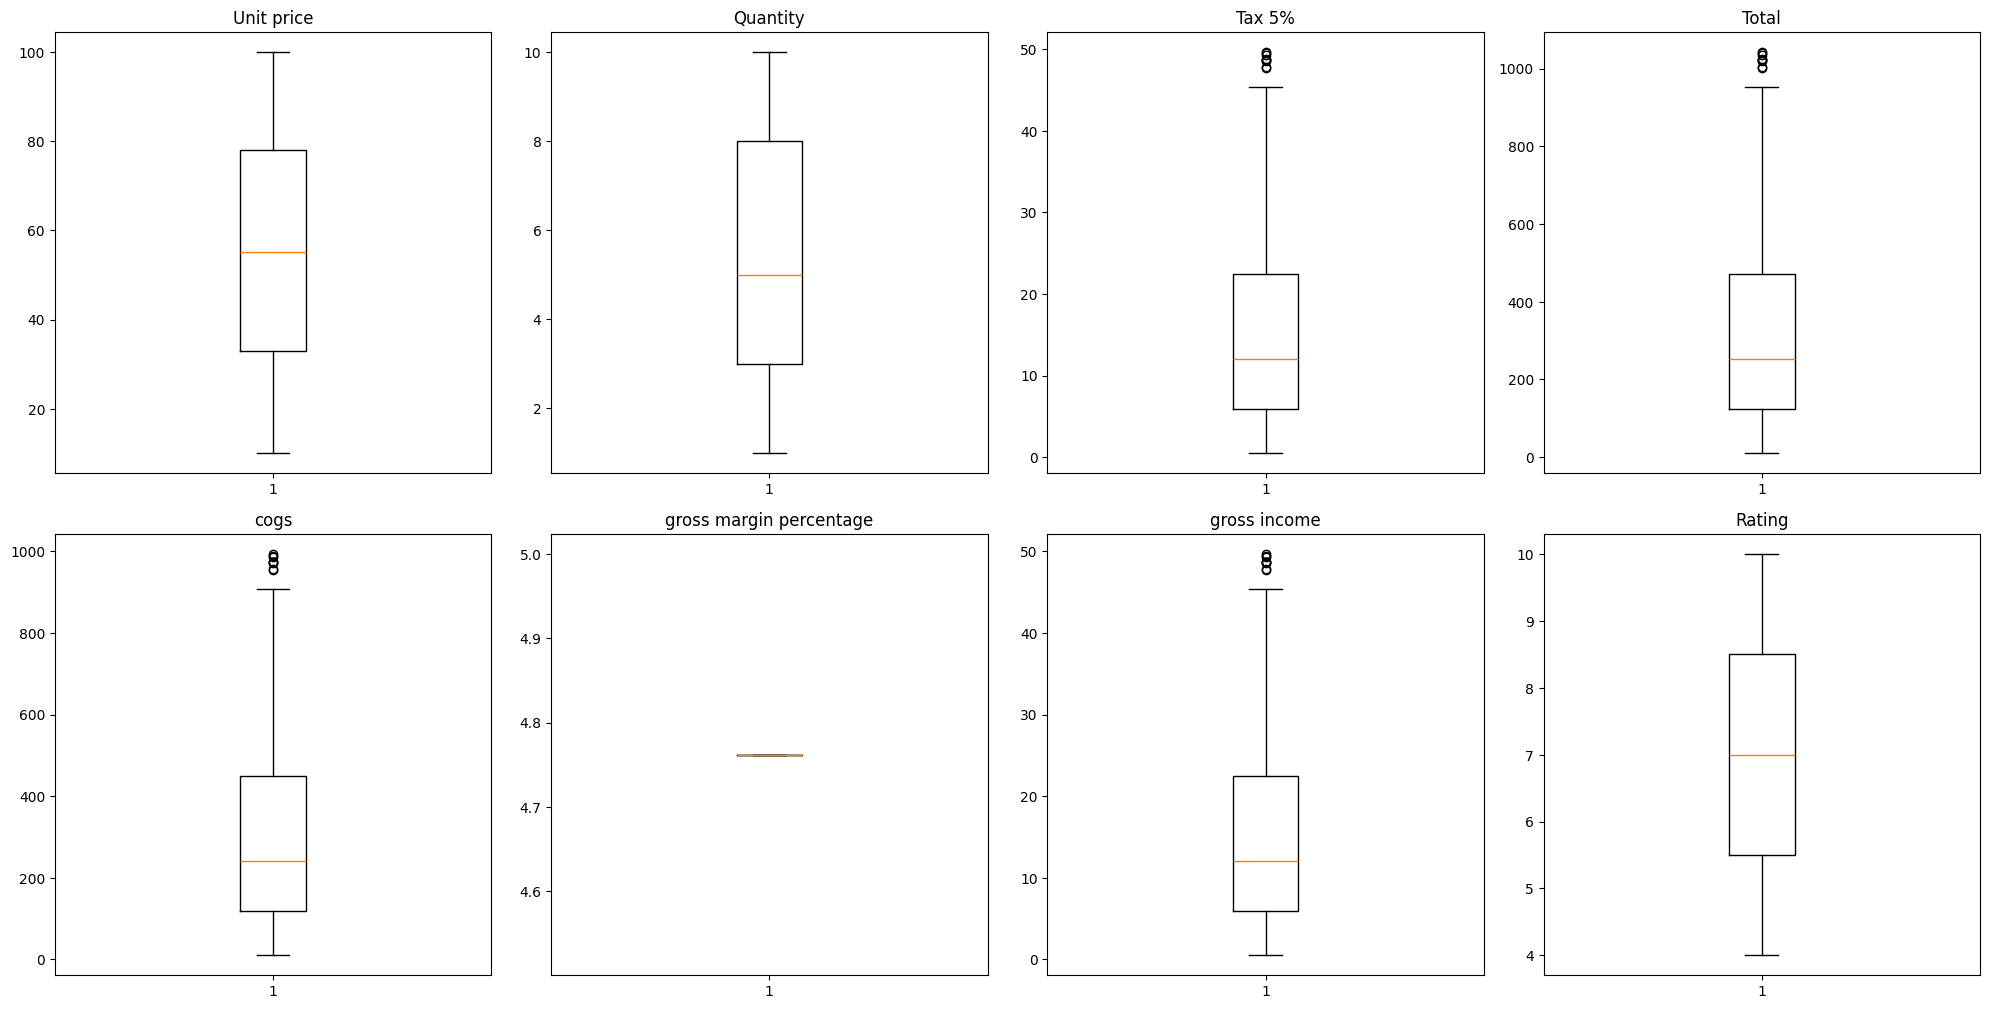

In [26]:
plot_boxplot(cont_df)

In [27]:
## Checking amd removing outliers
def remove_outliers(df):
    for col in df.columns:
        ## Setting the quantiles

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        ## Calculating the IQR
        IQR = Q3 - Q1

        ## Calculating the limits
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        ## Removing the outliers

        df[col] = np.where(df[col] < lower,lower,df[col])
        df[col] = np.where(df[col] > upper,upper,df[col])

In [28]:
remove_outliers(cont_df)

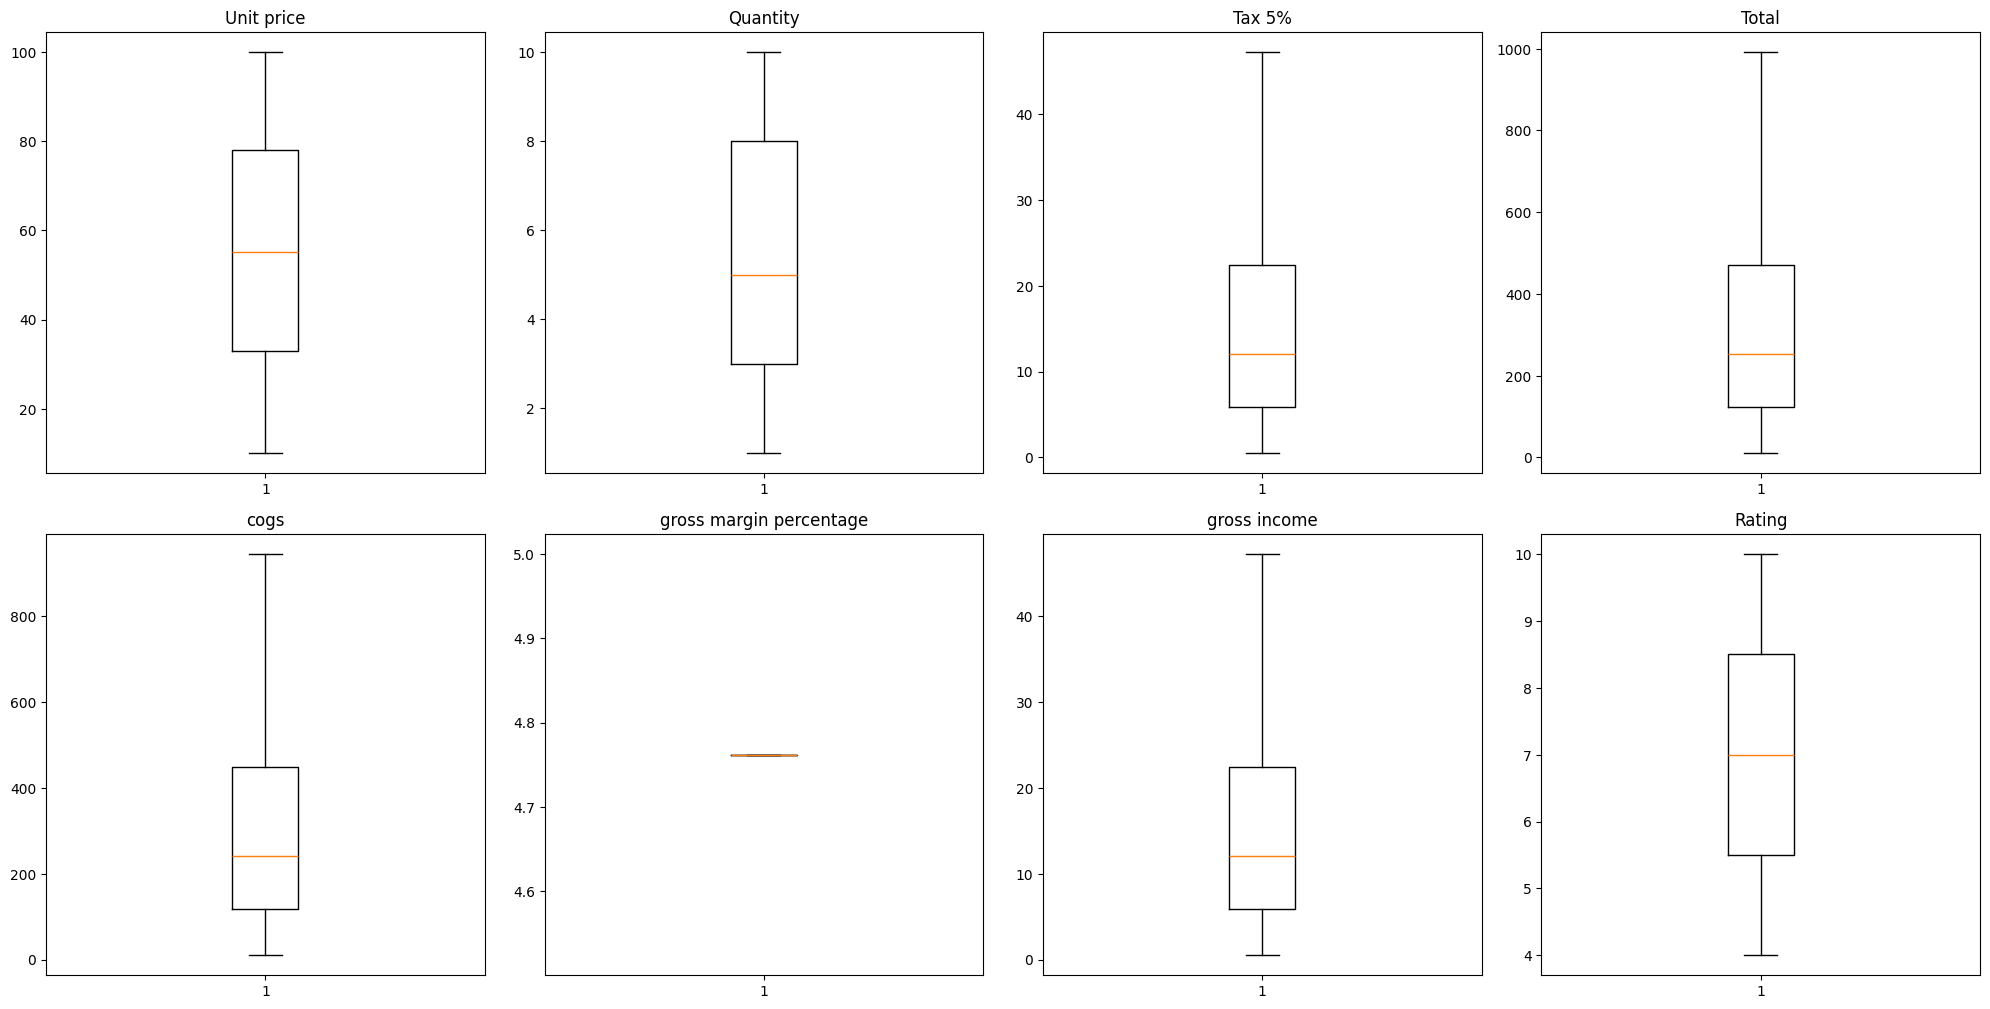

In [29]:
plot_boxplot(cont_df)

In [30]:
### Answering Questions
df2 = pd.read_csv('supermarket_sales - Sheet1.csv')
df2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [31]:
df2.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [39]:
## What is the total revenue and profitgenerated across all branches and time period
## Total revenue and profit
df2.agg('Total':'sum','gross income':'sum'})

Total           322966.749
gross income     15379.369
dtype: float64

In [40]:
## The total revenue by branch
df2.groupby(['Branch','City']).agg({'Total':'sum','gross income':'sum'})

,,Total,gross income
Branch,City,,
A,Yangon,106200.3705,5057.1605
B,Mandalay,106197.6720,5057.0320
C,Naypyitaw,110568.7065,5265.1765


In [41]:
## Total revenue by Product line
df2.groupby(['Product line']).agg({'Total':'sum','gross income':'sum'})

,Total,gross income
Product line,,
Electronic accessories,54337.5315,2587.5015
Fashion accessories,54305.8950,2585.9950
Food and beverages,56144.8440,2673.5640
Health and beauty,49193.7390,2342.5590
Home and lifestyle,53861.9130,2564.8530
Sports and travel,55122.8265,2624.8965


CALCUTING THE TOTAL PERIOD TAKEN

In [42]:
df2.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [44]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [45]:
df2.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [48]:
#### The total number of days taken
total_days = (df2['Date'].max() - df2['Date'].min()).days
print(f'The total number of days taken are {total_days}')

The total number of days taken are 88


In [53]:
### Total period in months
total_period_months = (df2['Date'].max().month - df2['Date'].min().month) 
print(f'The total period is {total_period_months} months')

The total period is 2 months


In [55]:
df2['Day_only'] = df2.Date.dt.dayofweek
df2.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_only
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6


In [56]:
df2['Day_Name'] = df2.Date.dt.day_name()
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_only,Day_Name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday


In [57]:
df2['Year'] = df2.Date.dt.year

In [59]:
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_only,Day_Name,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,Friday,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2019


In [60]:
df2.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day_only                            int32
Day_Name                           object
Year                                int32
dtype: object

In [62]:
df2['Time'] = pd.to_datetime(df2['Time'])

In [63]:
df2.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day_only                            int32
Day_Name                           object
Year                                int32
dtype: object

In [64]:
df2['Hour'] = df2.Time.dt.hour

In [65]:
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_only,Day_Name,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-07-19 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-07-19 10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,Friday,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-07-19 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-07-19 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-07-19 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2019,10


In [66]:
df2.shape

(1000, 21)

In [68]:
pd.set_option('display.max_columns',21)
df2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_only,Day_Name,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-07-19 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-07-19 10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,Friday,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-07-19 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-07-19 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-07-19 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-07-19 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,1,Tuesday,2019,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-07-19 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,5,Saturday,2019,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-07-19 13:22:00,Cash,31.84,4.761905,1.5920,7.7,5,Saturday,2019,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-07-19 15:33:00,Cash,65.82,4.761905,3.2910,4.1,4,Friday,2019,15


In [76]:
df2['time'] = df2.Time.dt.minute

In [77]:
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day_only,Day_Name,Year,Hour,time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,4,Friday,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2019,10,37
